In [1]:
import ot # POT (Python Optimal Transport) package 
import numpy as np
import matplotlib.pylab as pl 
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE as tsne 
import pointcloud_utils as pcu

# Finding the right Earth Mover's Distance 

To compute distances between clusters, we need to be insensitive to underlying transformations of the plane. To get a sense of how t-SNE can oscillate, let's just take a two-component Gaussian mixture in two dimensions to start. 

## Well-separated Gaussians

Let's see what happens for well-separated Gaussians. First we generate some data. 

In [2]:
# Number samples 
n = 100

# Parameters
means = np.array([[4.0, 4.0], [0.0, 0.0]])
covs = np.array([[[1.0, -0.8], [-.8, 1.0]], [[1.0, 0.0], [0.0, 1.0]]])

# Mixture proportions 
weights = np.array([0.5,0.5])

# Generate indices 
mixture_idx = np.random.choice(2, size = n, replace = True, p = weights)

# Number of samples from each component 
n_1 = sum(mixture_idx)
n_0 = n - n_1

# Generate 0,1 labels for downstream analysis
cluster_id = np.ones(n)
cluster_id[0:n_0] = 0

# Now sample 
x_0, y_0 = np.random.multivariate_normal(means[0], covs[0], n_0).T
x_1, y_1 = np.random.multivariate_normal(means[1], covs[1], n_1).T

# Generate arrays for each cluster 
c_0 = np.column_stack((x_0, y_0))
c_1 = np.column_stack((x_1, y_1))

# Massage into one data matrix, respecting the label order from above 
X = np.vstack((c_0, c_1))

Text(0.5,1,'Original Data')

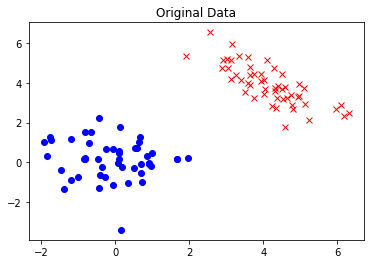

In [418]:
plt.plot(x_0, y_0, 'rx', x_1, y_1, 'bo')
plt.title("Original Data")

### Scaling

With a fixed dataset, we can do a few simple things. First we can run lots of t-SNEs and look at the distribution of the range of x-values and y-values. This helps give a sense for scale variation. The Gaussian mixtures have means $(0,0)$ and $(4,4)$, so the separation is roughly $5$. By design, the covariances are close to identity. Even for such a nice case, the coordinate ranges are surprisingly variable --  

In [327]:
tot = 100
x_range = np.zeros(tot)
y_range = np.zeros(tot)

# WARNING: You are about to run a lot of t-SNE's
print("WARNING: You are about to run %d t-SNE's" % tot)
for i in range(tot): 
    X_embed = tsne().fit_transform(X)
    x_range[i] = max(X_embed[:,0]) - min(X_embed[:,0])
    y_range[i] = max(X_embed[:,1]) - min(X_embed[:,1])

Here's a plot of the xrange vs yrange values. The negative correlation is expected but the smoothness of the variation is interesting to note. 

Text(0.5,1,"Y range values vs X range values over 100 t-SNE's")

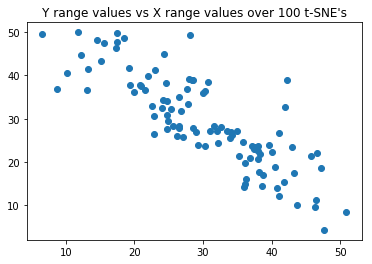

In [420]:
plt.scatter(x_range, y_range)
plt.title("Y range values vs X range values over 100 t-SNE's")

Here are the marginal histograms of the ranges. 

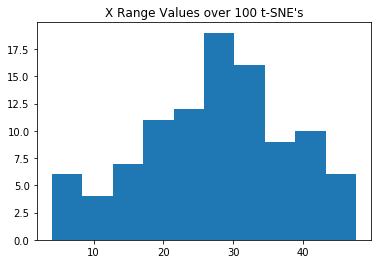

Text(0.5,1,"Y Range Values over 100 t-SNE's")

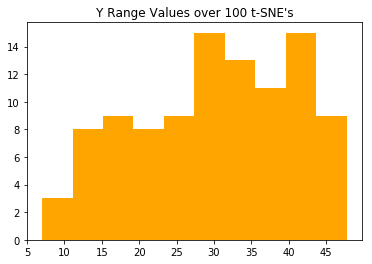

In [286]:
plt.hist(x_range)
plt.title("X Range Values over 100 t-SNE's")
plt.show()

plt.hist(y_range, color = 'orange')
plt.title("Y Range Values over 100 t-SNE's")

### Rotation

Next, we can try just plotting two t-SNE's together to see how much clusters can shift. Colors indicate underlying class and markers denote first vs second run of t-SNE. I don't have a better approach than just rerunning this a lot (it's very fast). 

One thing I didn't expect is that clusters will often just switch positions between two t-SNEs. When clusters are roughly the same size this may not be a problem, but when we examine clusterings with large size variation this could be problematic. 

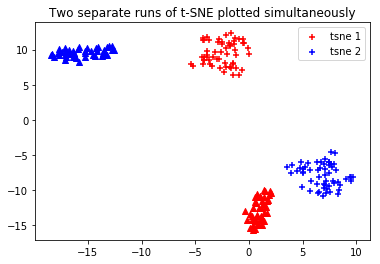

In [13]:
# Generate two t-SNE clusterings 
X_embed = tsne(n_components=2).fit_transform(X)
X_embed_2 = tsne(n_components=2).fit_transform(X)

# Plot them

fig, ax = plt.subplots() 

x = X_embed[:,0]
y = X_embed[:,1]
ax.scatter(x[cluster_id == 0], y[cluster_id == 0], marker = '^', color = 'red')
ax.scatter(x[cluster_id == 1], y[cluster_id == 1], marker = '+', color = 'red', label = 'tsne 1')

x = X_embed_2[:,0]
y = X_embed_2[:,1]
ax.scatter(x[cluster_id == 0], y[cluster_id == 0], marker = '^', color = 'blue')
ax.scatter(x[cluster_id == 1], y[cluster_id == 1], marker = '+', color = 'blue', label  = 'tsne 2')
plt.legend()
plt.title("Two separate runs of t-SNE plotted simultaneously")
plt.show()

In [14]:
F = X_embed_2 
F = pcu.rescale(F, X_embed)
F = pcu.align(F, X_embed)

In [16]:
pcu.dist(F, X_embed)

0.008383711261777584

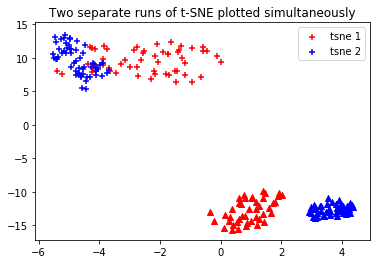

In [15]:
fig, ax = plt.subplots() 

x = X_embed[:,0]
y = X_embed[:,1]
ax.scatter(x[cluster_id == 0], y[cluster_id == 0], marker = '^', color = 'red')
ax.scatter(x[cluster_id == 1], y[cluster_id == 1], marker = '+', color = 'red', label = 'tsne 1')

x = F[:,0]
y = F[:,1]
ax.scatter(x[cluster_id == 0], y[cluster_id == 0], marker = '^', color = 'blue')
ax.scatter(x[cluster_id == 1], y[cluster_id == 1], marker = '+', color = 'blue', label  = 'tsne 2')
plt.legend()
plt.title("Two separate runs of t-SNE plotted simultaneously")
plt.show()

## Highly overlapping case 

Let's redo this analysis for the overlapping case. Now I pick means to be $(0,0)$ and $(1.3,1.3)$ with the same covariance structure. 

In [431]:
# Number samples 
n = 100

# Parameters
means = np.array([[1.3, 1.3], [0.0, 0.0]])
covs = np.array([[[1.0, 0.0], [0.0, 1.0]], [[1.0, 0.0], [0.0, 1.0]]])

# Mixture proportions 
weights = np.array([0.5,0.5])

# Get indices 
mixture_idx = np.random.choice(2, size = n, replace = True, p = weights)

# Number of samples from each component 
n_1 = sum(mixture_idx)
n_0 = n - n_1

# Generate 0,1 labels for downstream analysis
cluster_id = np.ones(n)
cluster_id[0:n_0] = 0

# Now sample 
x_0, y_0 = np.random.multivariate_normal(means[0], covs[0], n_0).T
x_1, y_1 = np.random.multivariate_normal(means[1], covs[1], n_1).T

# Generate arrays for each cluster 
c_0 = np.column_stack((x_0, y_0))
c_1 = np.column_stack((x_1, y_1))

# Massage into one data matrix, respecting the label order from above 
X_overlap = np.vstack((c_0, c_1))

Text(0.5,1,'Original Data')

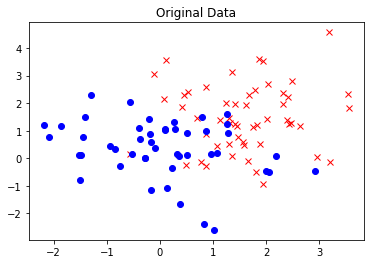

In [435]:
plt.plot(x_0, y_0, 'rx', x_1, y_1, 'bo')
plt.title("Original Data")

### Scaling 

Again, we run a lot of iterations and look at the overall scale of t-SNE. 

In [432]:
tot = 100
x_range = np.zeros(tot)
y_range = np.zeros(tot)

# WARNING: You are about to run a lot of t-SNE's
print("WARNING: You are about to run %d t-SNE's" % tot)
for i in range(tot): 
    X_embed = tsne().fit_transform(X_overlap)
    x_range[i] = max(X_embed[:,0]) - min(X_embed[:,0])
    y_range[i] = max(X_embed[:,1]) - min(X_embed[:,1])

The scatter plot remains negatively correlated, but now we see a much more stable range for both coordinates, minus a few extreme outliers. 

Text(0.5,1,"Y range vs X range over 100 t-SNE's, overlapping data")

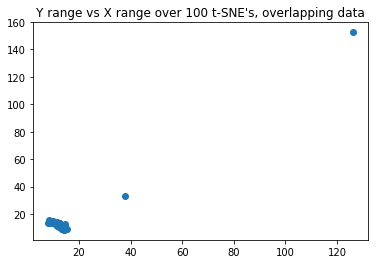

In [433]:
plt.scatter(x_range, y_range)
plt.title("Y range vs X range over 100 t-SNE's")

Text(0.5,1,"Y range vs X range over 100 t-SNE's, overlapping data")

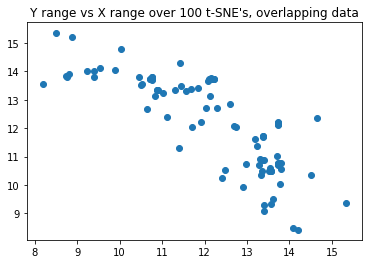

In [439]:
plt.scatter(x_range[x_range < 30], y_range[y_range < 30])
plt.title("Y range vs X range over 100 t-SNE's, outliers removed")

This bimodal nature is reflected in the marginal histograms. 

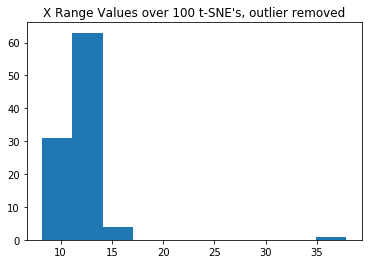

Text(0.5,1,"Y Range Values over 100 t-SNE's, outlier removed")

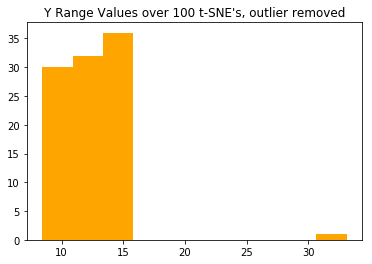

In [440]:
plt.hist(x_range[x_range < 50])
plt.title("X Range Values over 100 t-SNE's, outlier removed")
plt.show()

plt.hist(y_range[y_range < 50], color = 'orange')
plt.title("Y Range Values over 100 t-SNE's, outlier removed")

### Rotation 

Because the scale fluctuates less, the relative location of clusters doesn't have as clear of a behavior. In general the two point clouds now overlap in a more consistent-looking way to me. 

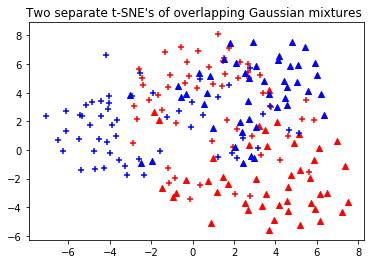

In [427]:
# Generate two t-SNE clusterings 
X_embed = tsne(n_components=2).fit_transform(X_overlap)
X_embed_2 = tsne(n_components=2).fit_transform(X_overlap)

# Plot them

fig, ax = plt.subplots() 

x = X_embed[:,0]
y = X_embed[:,1]
ax.scatter(x[cluster_id == 0], y[cluster_id == 0], marker = '^', color = 'red')
ax.scatter(x[cluster_id == 1], y[cluster_id == 1], marker = '+', color = 'red', label = 'tsne 1')

x = X_embed_2[:,0]
y = X_embed_2[:,1]
ax.scatter(x[cluster_id == 0], y[cluster_id == 0], marker = '^', color = 'blue')
ax.scatter(x[cluster_id == 1], y[cluster_id == 1], marker = '+', color = 'blue', label = 'tsne 2')

plt.title("Two separate t-SNE's of overlapping Gaussian mixtures ")
plt.show()

## First shot at computing a null

Given these observations, I will now compute a null for t-SNE on this data as follows. 

1. Fit an initial t-SNE embedding. 
2. Now recompute 100 more and rescale x and y marginally to have the same ranges as the one from step 1. 
3. Compute Earth Mover's Distance (EMD) between these point clouds with uniform weights on every point. 

My guess is that this may look somewhat reasonable for the highly overlapping clusters, but will be far more variable for the well-separated ones. 


In [47]:
pcu.dist()

AttributeError: module 'pointcloud_utils' has no attribute 'dist'

In [413]:
tot = 100

X_embed = tsne().fit_transform(X)
xrange = max(X_embed[:,0]) - min(X_embed[:,0])
yrange = max(X_embed[:,1]) - min(X_embed[:,1])

null_sep = np.zeros(tot)

print("WARNING: You are about to run %d t-SNE's" % tot)
for i in range(tot):
    X_embed2 = tsne().fit_transform(X)
    X_embed2[:, 0] *= xrange/(max(X_embed2[:,0]) - min(X_embed2[:,0]))
    X_embed2[:, 1] *= yrange/(max(X_embed2[:,1]) - min(X_embed2[:,1]))
    
    # Build distance matrix 
    M = ot.dist(X_embed, X_embed2)
    M /= M.max() 

    # Declare sample weights (just uniform for now)
    a,b = np.ones((n,))/n, np.ones((n,))/n

    # Optimal Transport Matrix 
    G0 = ot.emd(a, b, M)
    
    # Compute EMD 
    null_sep[i] = np.multiply(G0, M).sum() / G0.sum()


In [415]:
tot = 100

X_embed = tsne().fit_transform(X_overlap)
xrange = max(X_embed[:,0]) - min(X_embed[:,0])
yrange = max(X_embed[:,1]) - min(X_embed[:,1])

null_overlap = np.zeros(tot)

print("WARNING: You are about to run %d t-SNE's" % tot)
for i in range(tot):
    X_embed2 = tsne().fit_transform(X_overlap)
    X_embed2[:, 0] *= xrange/(max(X_embed2[:,0]) - min(X_embed2[:,0]))
    X_embed2[:, 1] *= yrange/(max(X_embed2[:,1]) - min(X_embed2[:,1]))
    
    # Build distance matrix 
    M = ot.dist(X_embed, X_embed2)
    M /= M.max() 

    # Declare sample weights (just uniform for now)
    a,b = np.ones((n,))/n, np.ones((n,))/n

    # Optimal Transport Matrix 
    G0 = ot.emd(a, b, M)
    
    # Compute EMD 
    null_overlap[i] = np.multiply(G0, M).sum() / G0.sum()


Exactly as we expect, the well-separated Gaussians have a bimodal null whereas the overlapping ones do not. Since these plots were generated after normalizing (roughly) for scale, it indicates that well-separated clusters can wander a lot during t-SNE runs whereas overlapping clusters have less freedom. 

Text(0.5,1,'Null distribution of EMD for separated Gaussians')

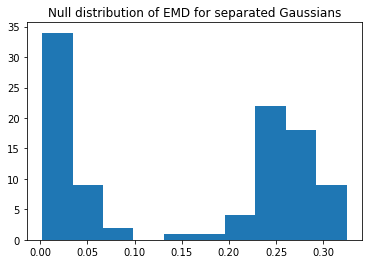

In [430]:
plt.hist(null_sep)
plt.title("Null distribution of EMD for separated Gaussians")

Text(0.5,1,'Null distributions of EMD for overlapping Gaussians')

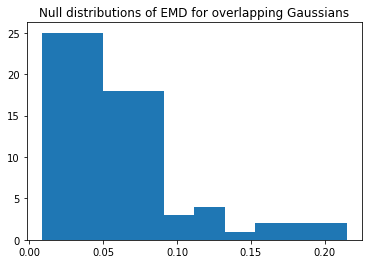

In [429]:
plt.hist(null_overlap)
plt.title("Null distributions of EMD for overlapping Gaussians")

## Some POT functionality

As a fun aside, here are some functions from the POT package. We can compute a distance matrix (default is squared Euclidean), compute the full optimal transport matrix for the two point clouds, and easily plot the flow of mass between them. 

Text(0.5,1,'OT matrix with samples')

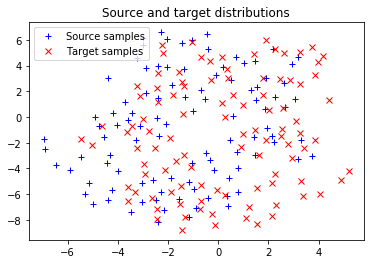

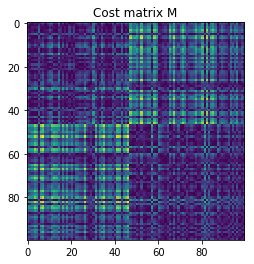

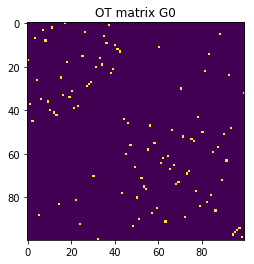

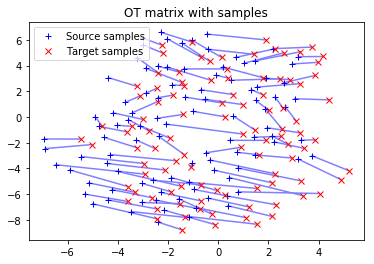

In [417]:
pl.figure(1)
pl.plot(X_embed[:, 0], X_embed[:, 1], '+b', label='Source samples')
pl.plot(X_embed2[:, 0], X_embed2[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('Source and target distributions')

pl.figure(2)
pl.imshow(M, interpolation='nearest')
pl.title('Cost matrix M')

pl.figure(3)
pl.imshow(G0, interpolation='nearest')
pl.title('OT matrix G0')

pl.figure(4)
ot.plot.plot2D_samples_mat(X_embed, X_embed2, G0, c=[.5, .5, 1])
pl.plot(X_embed[:, 0], X_embed[:, 1], '+b', label='Source samples')
pl.plot(X_embed2[:, 0], X_embed2[:, 1], 'xr', label='Target samples')
pl.legend(loc=0)
pl.title('OT matrix with samples')